In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
import preprocess as pre

In [432]:
data = pd.read_csv('diabetes.csv')

In [419]:
data.groupby('BMI')['Outcome'].mean().reset_index()

,BMI,Outcome
0,18.2,0.0
1,18.4,0.0
2,19.1,0.0
3,19.3,0.0
4,19.4,0.0
...,...,...
243,53.2,1.0
244,55.0,1.0
245,57.3,0.0
246,59.4,1.0


In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [367]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
for i in data.columns:
    print(data[i].value_counts())

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26 

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


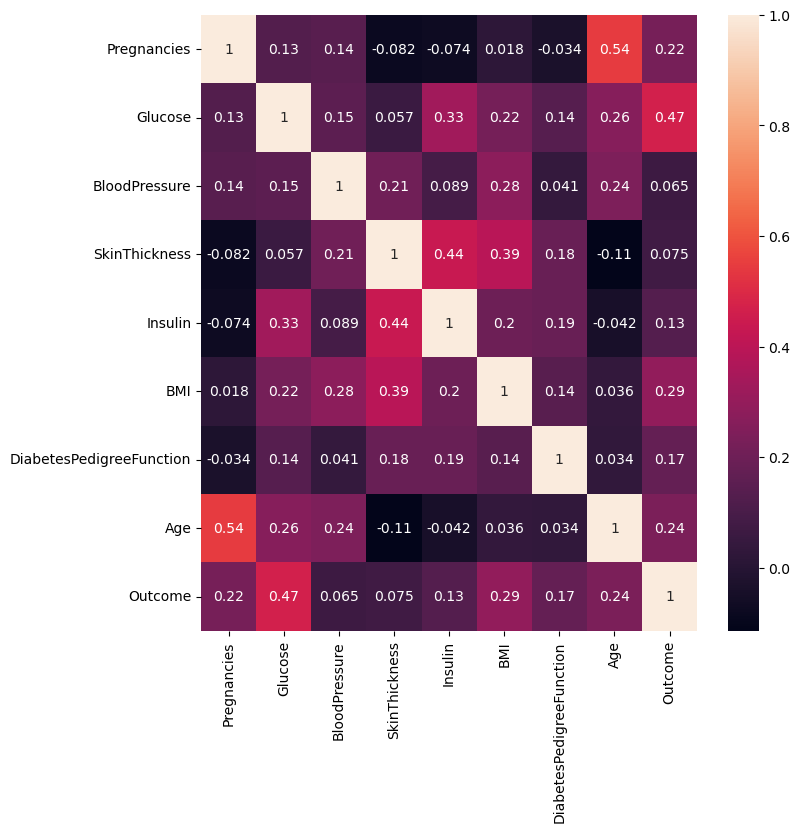

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot = True );

In [433]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [434]:
def ageRange(age) :
    if 21 <= age < 30 :
        return 1
    elif 30 <= age < 40 :
        return 2
    elif 40 <= age < 50 :
        return 3
    elif 50 <= age < 60 :
        return 4
    elif 60 <= age < 70 :
        return 5
    else :
        return 6

In [435]:
data['Age2']=data['Age'].apply(ageRange)

In [424]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     131.0000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                           1.0000
Outcome                       0.0000
dtype: float64

In [422]:
## 나이에 따른 중앙값
data.groupby('Age').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,,,,,,,,
1,2.0,109.0,68.0,27.0,105.0,31.60,0.3655,0.0
2,5.0,122.0,74.0,32.0,140.0,32.00,0.4200,0.0
3,7.0,123.0,78.0,31.0,131.0,33.95,0.3330,1.0
4,7.0,139.0,78.0,28.5,192.0,33.05,0.4520,1.0
5,5.0,136.0,78.0,31.0,258.0,29.30,0.4190,0.0
6,4.0,134.0,78.0,25.5,60.0,25.90,0.4600,0.0


In [374]:
## 공백에 나이에 따른 중앙값으로 치환
for i in data.columns:
    data[i].fillna(data.groupby('Age2')[i].transform('median'),inplace=True)

In [236]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [354]:
data[data['BMI'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age2


In [376]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age2
0,6,148.0,72.0,35.0,192.0,33.6,0.627,50,1,4
1,1,85.0,66.0,29.0,140.0,26.6,0.351,31,0,2
2,8,183.0,64.0,32.0,140.0,23.3,0.672,32,1,2
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,2
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,5
764,2,122.0,70.0,27.0,105.0,36.8,0.340,27,0,1
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,2
766,1,126.0,60.0,31.0,131.0,30.1,0.349,47,1,3


In [377]:
data['Age']= data['Age2']

In [383]:
data.drop('Age2', axis=1, inplace=True)

In [384]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,192.0,33.6,0.627,4,1
1,1,85.0,66.0,29.0,140.0,26.6,0.351,2,0
2,8,183.0,64.0,32.0,140.0,23.3,0.672,2,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,2,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,5,0
764,2,122.0,70.0,27.0,105.0,36.8,0.340,1,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,2,0
766,1,126.0,60.0,31.0,131.0,30.1,0.349,3,1


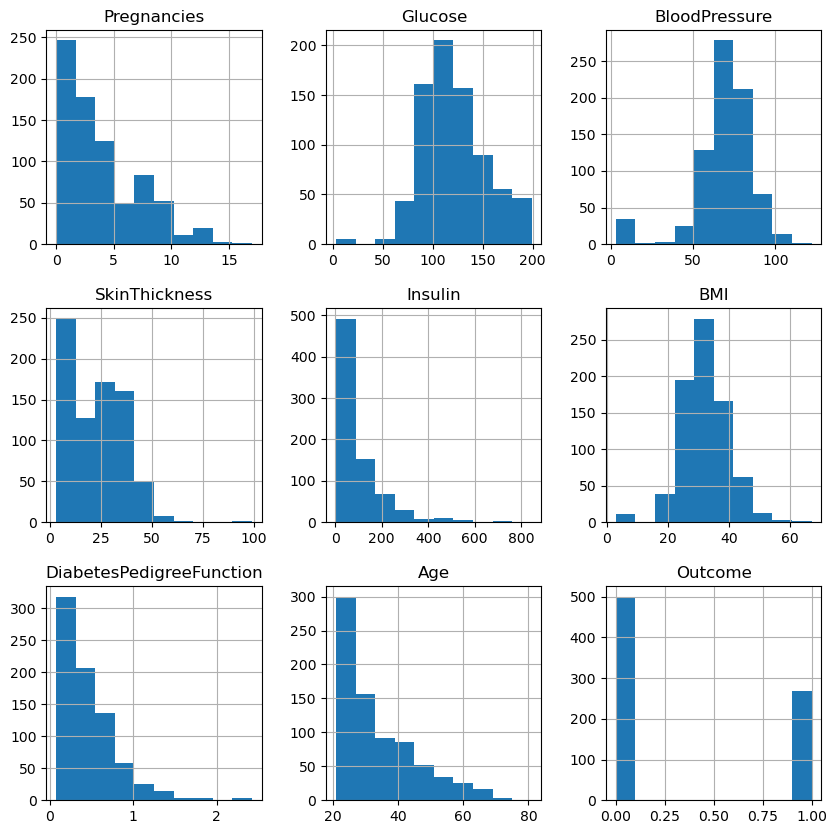

In [184]:
data.hist(figsize = (10,10));

In [362]:
x= data.drop('Outcome' , axis=1)

In [363]:
y = data['Outcome']

In [167]:
x

array([[0.35294118, 0.73979592, 0.57983193, ..., 0.4773791 , 0.23441503,
        0.48333333],
       [0.05882353, 0.41836735, 0.52941176, ..., 0.36817473, 0.11656704,
        0.16666667],
       [0.47058824, 0.91836735, 0.51260504, ..., 0.31669267, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.60204082, 0.57983193, ..., 0.36193448, 0.07130658,
        0.15      ],
       [0.05882353, 0.62755102, 0.4789916 , ..., 0.42277691, 0.11571307,
        0.43333333],
       [0.05882353, 0.45918367, 0.56302521, ..., 0.4274571 , 0.10119556,
        0.03333333]])

In [385]:
M_scaler = MinMaxScaler()
#M_scaler.fit_transform(data['DiabetesPedigreeFunction'].reshape(1,-1))
x =  pd.DataFrame(M_scaler.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [386]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.213942,0.314928,0.234415,0.6
1,0.058824,0.264516,0.428571,0.239130,0.151442,0.171779,0.116567,0.2
2,0.470588,0.896774,0.408163,0.271739,0.151442,0.104294,0.253629,0.2
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.2
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.8
764,0.117647,0.503226,0.469388,0.217391,0.109375,0.380368,0.111870,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.2
766,0.058824,0.529032,0.367347,0.260870,0.140625,0.243354,0.115713,0.4


In [97]:
S_scaler= StandardScaler()
x= S_scaler.fit_transform(x)

In [98]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [103]:
R_scaler= RobustScaler()
x= R_scaler.fit_transform(x)

TypeError: float() argument must be a string or a number, not 'RobustScaler'

In [119]:
data['Pregnancies2']= np.where(data['Pregnancies']==0,0,1) 

In [120]:
data.groupby(['Pregnancies2','Outcome'])['Age'].count()

Pregnancies2  Outcome
0             0           73
              1           38
1             0          427
              1          230
Name: Age, dtype: int64

In [123]:
data.groupby('Outcome')['Age', 'BMI'].min()

C:\Users\user\AppData\Local\Temp\ipykernel_6132\3004837293.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Outcome')['Age', 'BMI'].min()


,Age,BMI
Outcome,,
0,21,0.0
1,21,0.0


In [124]:
data[data['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies2
9,8,125,96,0,0,0.0,0.232,54,1,1
49,7,105,0,0,0,0.0,0.305,24,0,1
60,2,84,0,0,0,0.0,0.304,21,0,1
81,2,74,0,0,0,0.0,0.102,22,0,1
145,0,102,75,23,0,0.0,0.572,21,0,0
371,0,118,64,23,89,0.0,1.731,21,0,0
426,0,94,0,0,0,0.0,0.256,25,0,0
494,3,80,0,0,0,0.0,0.174,22,0,1
522,6,114,0,0,0,0.0,0.189,26,0,1
684,5,136,82,0,0,0.0,0.640,69,0,1


In [89]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [387]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=22)

In [388]:
model= SVC(kernel='rbf' )

In [311]:
model.fit(x_train,y_train)

SVC()

In [312]:
model.score(x_train, y_train)

0.8061889250814332

In [313]:
model.score(x_test, y_test)

0.7337662337662337

In [53]:
for c in range(1,5):
    for i in range (1,10)
        

MinMaxScaler()

In [55]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [329]:
from sklearn.linear_model import LogisticRegression , LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')

In [389]:
model2 = LogisticRegression()
model3 = LogisticRegressionCV()
d=[(x_train,y_train),( x_test, y_test)]


In [390]:
## 모델로 트레인 테스트 돌림
def trainModel(model, d):
    for i,j in enumerate(d):
        ## d리스트의 n번째 스코어 뽑아옴
        if i ==0:
            ## 테스트 에서만 학습시키고
            model.fit(j[0],j[1])
            # 트레인 점수
            print('train',model.score(j[0],j[1]))
        else :
            # 테스트 점수
            print('test',model.score(j[0],j[1]))

In [391]:
trainModel(model,d)

train 0.8061889250814332
test 0.6883116883116883


In [392]:
trainModel(model2,d)

train 0.7817589576547231
test 0.7467532467532467


In [393]:
trainModel(model3,d)

train 0.7768729641693811
test 0.7402597402597403


In [394]:
## 테스트 할 데이터 추출 내 트레인 데이터 x는 이미 스케일링이 되어 있어서 실제 데이터가 아님
## 실 데이터는 재 스케일링 필요
real=x.iloc[100].values

In [404]:
real

array([[0.05882353, 0.76774194, 0.48979592, 0.27173913, 0.15144231,
        0.42535787, 0.48847139, 0.2       ]])

In [403]:
## 리스트인 real을 2중 리스트로 변경
real =real.reshape(1,-1)

In [421]:
 pd.DataFrame(real)

,0,1,2,3,4,5,6,7
0,0.058824,0.767742,0.489796,0.271739,0.151442,0.425358,0.488471,0.2


In [400]:
# 1 .전처리 후 모델 생성


# 2. 전처리 결과와 모델 저장
import pickle
with open('model.pkl', 'wb') as f :
    pickle.dump(model2,f)



In [401]:
# 3. 리얼데이터 예측
with open('model.pkl', 'rb') as f :
    model_load = pickle.load(f)

In [406]:
result =model_load.predict(real)

In [ ]:
if result ==1:
    print('당뇨 확률 높음')
else : 
    print('당뇨 확률 낮음')

당뇨 확률 높음


In [547]:
## 나이대 범위별로 피쳐들의 중앙값을 구한다.
for i in col_list:
    print(i,':',data.groupby('Age2')[i].median())

Glucose : Age2
1    109.0
2    122.0
3    123.0
4    139.0
5    136.0
6    134.0
Name: Glucose, dtype: float64
BloodPressure : Age2
1    68.0
2    74.0
3    78.0
4    78.0
5    78.0
6    78.0
Name: BloodPressure, dtype: float64
SkinThickness : Age2
1    27.0
2    32.0
3    31.0
4    28.5
5    31.0
6    25.5
Name: SkinThickness, dtype: float64
Insulin : Age2
1    105.0
2    140.0
3    131.0
4    192.0
5    258.0
6     60.0
Name: Insulin, dtype: float64
BMI : Age2
1    31.60
2    32.00
3    33.95
4    33.05
5    29.30
6    25.90
Name: BMI, dtype: float64


In [546]:
dict_tot1

{'Glucose': {1: 109.0, 2: 122.0, 3: 123.0, 4: 139.0, 5: 136.0, 6: 134.0},
 'BloodPressure': {1: 68.0, 2: 74.0, 3: 78.0, 4: 78.0, 5: 78.0, 6: 78.0},
 'SkinThickness': {1: 27.0, 2: 32.0, 3: 31.0, 4: 28.5, 5: 31.0, 6: 25.5},
 'Insulin': {1: 105.0, 2: 140.0, 3: 131.0, 4: 192.0, 5: 258.0, 6: 60.0},
 'BMI': {1: 31.6, 2: 32.0, 3: 33.95, 4: 33.05, 5: 29.3, 6: 25.9}}

---------

# 실제 데이터

In [1]:
real = data.iloc[100].values

NameError: name 'data' is not defined

In [457]:
index = data.groupby('Age2')['Glucose'].median().index
value = data.groupby('Age2')['Glucose'].median().values
col_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [469]:
# 실제 예측할 대상 데이터의 예측을 위해 나이에 따른 컬럼들의 중앙값 저장
## 학습했을때의 전처리(범주화, 널처리, 스케일링)을 다시 예측할 데이터에 씌워주는 작업에 쓰임
dict_tot={}
for col in col_list:
    index = data.groupby('Age2')[col].median().index
    value = data.groupby('Age2')[col].median().values
    temp ={}
    for i in range(len(index)):
        temp[index[i]]= value[i]
    dict_tot[col]= temp

In [470]:
dict_tot

{'Glucose': {1: 109.0, 2: 122.0, 3: 123.0, 4: 139.0, 5: 136.0, 6: 134.0},
 'BloodPressure': {1: 68.0, 2: 74.0, 3: 78.0, 4: 78.0, 5: 78.0, 6: 78.0},
 'SkinThickness': {1: 27.0, 2: 32.0, 3: 31.0, 4: 28.5, 5: 31.0, 6: 25.5},
 'Insulin': {1: 105.0, 2: 140.0, 3: 131.0, 4: 192.0, 5: 258.0, 6: 60.0},
 'BMI': {1: 31.6, 2: 32.0, 3: 33.95, 4: 33.05, 5: 29.3, 6: 25.9}}

In [435]:
## age 컬럼에 ageRange 함수 로 레인지로 변경
data['Age2']=data['Age'].apply(pre.ageRange)

In [471]:
with open('dict.pkl', 'wb') as f :
    pickle.dump(dict_tot,f)
dict_tot
with open('dict.pkl', 'rb') as f :
    dict_tot1 = pickle.load(f)
with open('model.pkl', 'rb') as f :
    load_model = pickle.load(f)

In [472]:
dict_tot1

{'Glucose': {1: 109.0, 2: 122.0, 3: 123.0, 4: 139.0, 5: 136.0, 6: 134.0},
 'BloodPressure': {1: 68.0, 2: 74.0, 3: 78.0, 4: 78.0, 5: 78.0, 6: 78.0},
 'SkinThickness': {1: 27.0, 2: 32.0, 3: 31.0, 4: 28.5, 5: 31.0, 6: 25.5},
 'Insulin': {1: 105.0, 2: 140.0, 3: 131.0, 4: 192.0, 5: 258.0, 6: 60.0},
 'BMI': {1: 31.6, 2: 32.0, 3: 33.95, 4: 33.05, 5: 29.3, 6: 25.9}}

In [3]:
real = np.asarray(real).reshape(1,-1)

NameError: name 'real' is not defined

In [518]:
real

array([[  1.   , 163.   ,  72.   ,     nan,     nan,  39.   ,   1.222,
         33.   ,   1.   ,   2.   ]])

In [519]:
df = pd.DataFrame(real, columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age2'])

In [507]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age2
0,1.0,163.0,72.0,NaN,NaN,39.0,1.222,33.0,1.0,2.0


In [508]:
df= df.drop(['Outcome','Age' ],axis=1)

In [456]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age2
0,1.0,163.0,72.0,NaN,NaN,39.0,1.222,2.0


In [ ]:
## df의 0번째 시크니스 컬럼의 값을 내 중앙값이 담긴 딕셔너리(dict_tot)의 key와 그 index로 value를 찾아 df 업데이트 
df.loc[0,'SkinThickness']= dict_tot1['SkinThickness'][df.loc[0]['Age2']]

In [498]:
list(dict_tot1.values())[0]

{1: 109.0, 2: 122.0, 3: 123.0, 4: 139.0, 5: 136.0, 6: 134.0}

In [504]:
dict_tot1['SkinThickness']

{1: 27.0, 2: 32.0, 3: 31.0, 4: 28.5, 5: 31.0, 6: 25.5}

In [481]:
##  널값에 딕트에 있는 중앙값 넣기
for col in col_list:
    df[col].fillna(dict_tot1[col][df.loc[0]['Age2']],inplace= True)

In [475]:
## age2 는 모델에 없기 때문에 삭제
df.drop('Age2', axis=1 , inplace=True)

In [520]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age2
0,1.0,163.0,72.0,NaN,NaN,39.0,1.222,33.0,1.0,2.0


In [483]:
load_model.predict(df)

array([1], dtype=int64)

In [542]:
## 널값만 변경
for col in col_ist:
    df[col].fillna(dict_tot1[col][df.loc[0]['Age2']], inplace=True)

In [543]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age2
0,1.0,163.0,72.0,32.0,140.0,39.0,1.222,33.0,1.0,2.0


In [537]:
df[df['SkinThickness'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age2
0,1.0,163.0,72.0,NaN,NaN,39.0,1.222,33.0,1.0,2.0


In [517]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age2
0,1.0,122.0,74.0,32.0,140.0,32.0,1.222,2.0


In [457]:
index = data.groupby('Age2')['Glucose'].median().index
value = data.groupby('Age2')['Glucose'].median().values
col_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [469]:
# 실제 예측할 대상 데이터의 예측을 위해 나이에 따른 컬럼들의 중앙값 저장
## 학습했을때의 전처리(범주화, 널처리, 스케일링)을 다시 예측할 데이터에 씌워주는 작업에 쓰임
dict_tot={}
for col in col_list:
    index = data.groupby('Age2')[col].median().index
    value = data.groupby('Age2')[col].median().values
    temp ={}
    for i in range(len(index)):
        temp[index[i]]= value[i]
    dict_tot[col]= temp

In [470]:
dict_tot

{'Glucose': {1: 109.0, 2: 122.0, 3: 123.0, 4: 139.0, 5: 136.0, 6: 134.0},
 'BloodPressure': {1: 68.0, 2: 74.0, 3: 78.0, 4: 78.0, 5: 78.0, 6: 78.0},
 'SkinThickness': {1: 27.0, 2: 32.0, 3: 31.0, 4: 28.5, 5: 31.0, 6: 25.5},
 'Insulin': {1: 105.0, 2: 140.0, 3: 131.0, 4: 192.0, 5: 258.0, 6: 60.0},
 'BMI': {1: 31.6, 2: 32.0, 3: 33.95, 4: 33.05, 5: 29.3, 6: 25.9}}

In [6]:
## age 컬럼에 ageRange 함수 로 레인지로 변경
data['Age2']=data['Age'].apply(pre.ageRange)

NameError: name 'data' is not defined